# Streaming Service Customer Churn Prediction and Recommendation Engine

Overview
This project is for 1) customer churn prediction for a streaming service company and 2) to build a recommendation engine for the users.

Currently, this notebook has steps to perform exploratory data analysis (EDA) on a streaming service customer dataset to understand factors contributing to customer churn.

The analysis focuses on identifying patterns, relationships, and insights within the data that can inform the development of a churn prediction model. Key areas explored include handling missing values, visualizing churn distribution, analyzing categorical and numerical features, and examining correlations.

This will later be enhanced with models to predict customer churn and provide recommendation engine.


### Data Sources
The two data sources for this project are below from kaggle:

Streaming Service Data: https://www.kaggle.com/datasets/akashanandt/streaming-service-data?resource=download which contains customer information, subscription details, engagement metrics, and churn status.
The Movie Dataset: https://www.kaggle.com/datasets/rounakbanik/the-movies-dataset

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/Streaming_churn.csv')
display(df.head())

,Customer_ID,Age,Gender,Subscription_Length,Region,Payment_Method,Support_Tickets_Raised,Satisfaction_Score,Discount_Offered,Last_Activity,Monthly_Spend,Churned
0,CUST000001,56.0,Male,54,South,PayPal,0,9.0,6.42,319,62.11,1
1,CUST000002,69.0,Female,21,East,Debit Card,1,2.0,13.77,166,37.27,1
2,CUST000003,46.0,Female,49,East,PayPal,3,8.0,19.91,207,61.82,0
3,CUST000004,32.0,Male,47,West,Debit Card,3,1.0,13.39,108,40.96,1
4,CUST000005,60.0,Male,6,East,Credit Card,2,NaN,13.18,65,45.97,0


# Exploratory Data Analysis (EDA)
Provide code for a list of things which can be done for EDA on the dataset "streaming_churn.csv" for customer churn prediction of the streaming service.

Check the dataset for missing values and handle them appropriately.


Check for missing values in the DataFrame and display the count per column.



In [ ]:
missing_values = df.isnull().sum()
display(missing_values)

,0
Customer_ID,0
Age,500
Gender,0
Subscription_Length,0
Region,0
Payment_Method,0
Support_Tickets_Raised,0
Satisfaction_Score,500
Discount_Offered,0
Last_Activity,0


Create box plots for each numerical column in the DataFrame

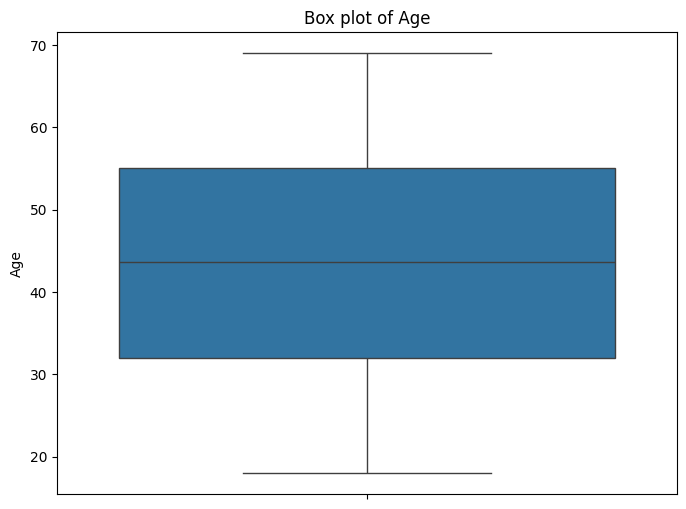

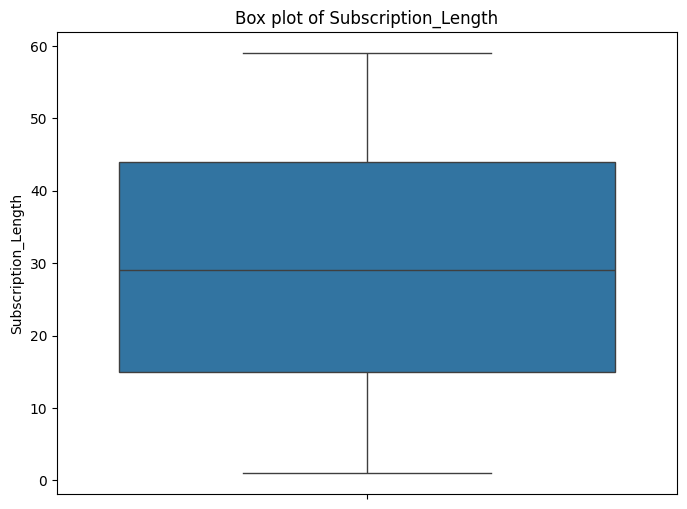

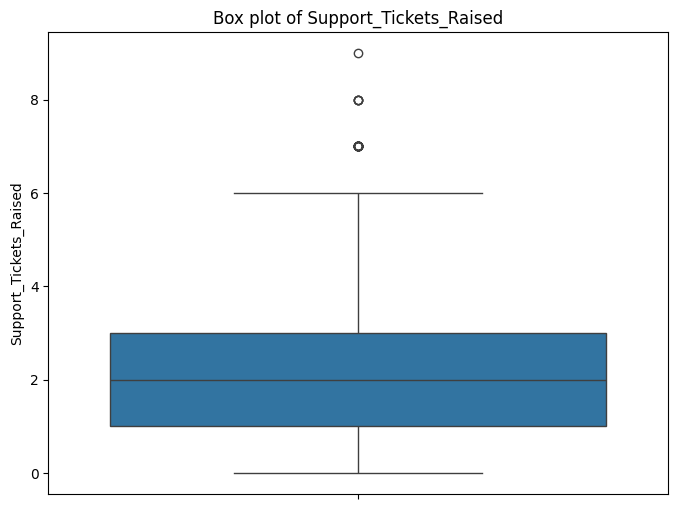

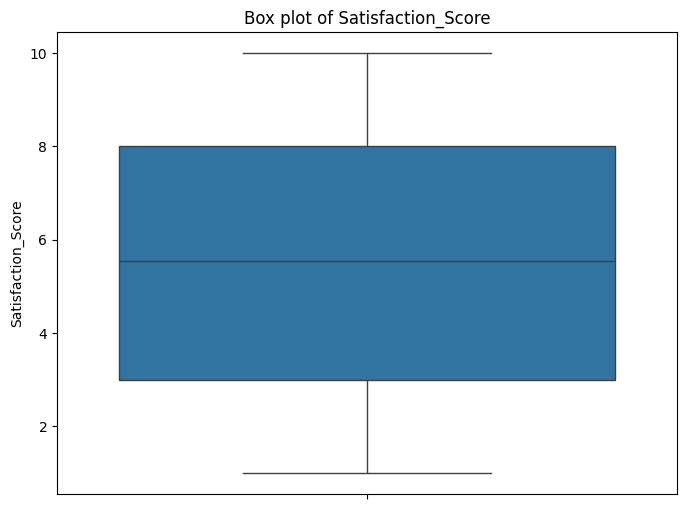

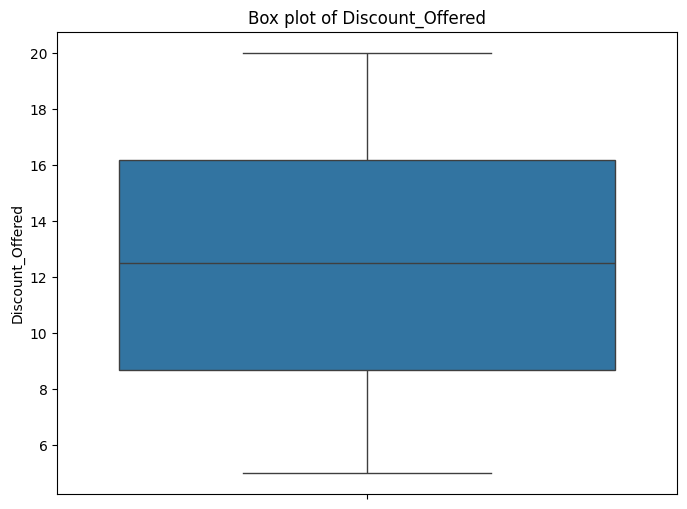

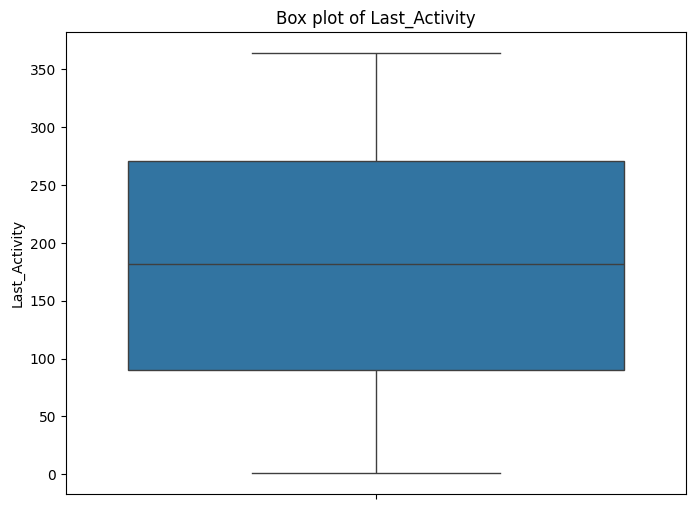

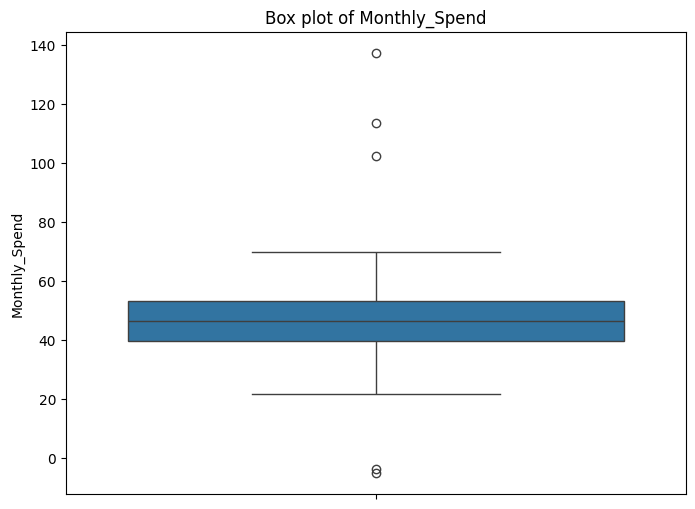

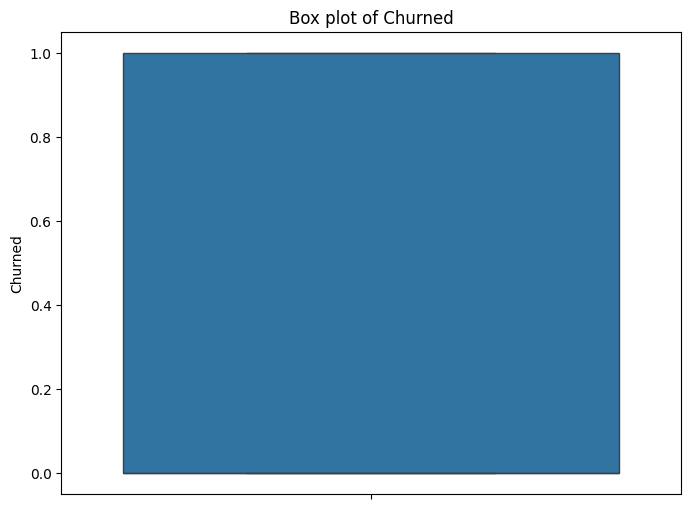

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
    plt.ylabel(col)
    plt.show()

Impute the missing values in 'Age' and 'Satisfaction_Score' using the mean of their respective columns, as these are numerical features and the mean is a common imputation strategy. There are 5000 items in dataset, removing null values will eliminate 20% of the dataset therefore replacement with mean seems to be a  better choice.



In [ ]:
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Satisfaction_Score'].fillna(df['Satisfaction_Score'].mean(), inplace=True)
display(df.isnull().sum())

/tmp/ipython-input-3695529983.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)
/tmp/ipython-input-3695529983.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

,0
Customer_ID,0
Age,0
Gender,0
Subscription_Length,0
Region,0
Payment_Method,0
Support_Tickets_Raised,0
Satisfaction_Score,0
Discount_Offered,0
Last_Activity,0


Plot the distribution of the churn variable to understand the class imbalance.


Create a count plot to visualize the distribution of the 'Churned' variable, adding a title and axis labels for clarity.



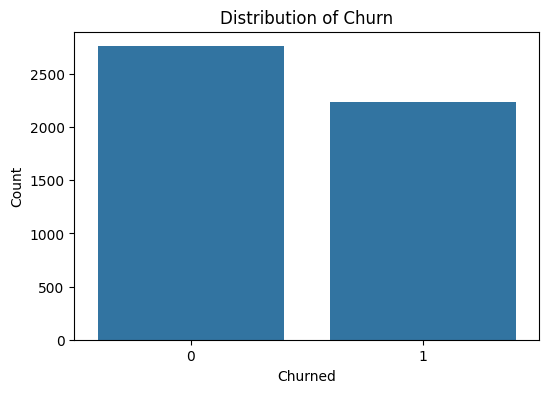

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Churned', data=df)
plt.title('Distribution of Churn')
plt.xlabel('Churned')
plt.ylabel('Count')
plt.show()

Analyze the relationship between categorical features and churn using visualizations:
Create count plots to visualize the distribution of churn within each category for the 'Gender', 'Region', and 'Payment_Method' columns to understand the relationship between these categorical features and churn.



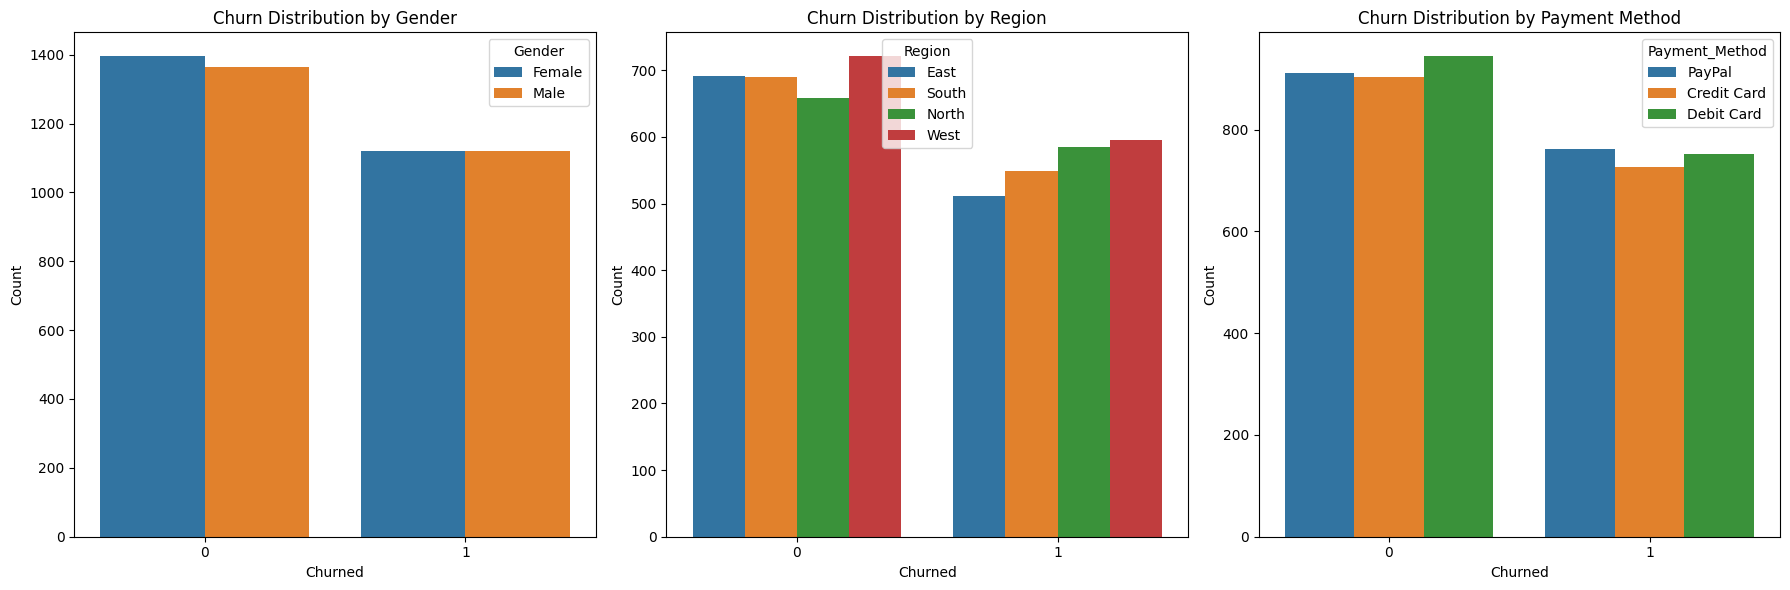

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.countplot(ax=axes[0], x='Churned', hue='Gender', data=df)
axes[0].set_title('Churn Distribution by Gender')
axes[0].set_xlabel('Churned')
axes[0].set_ylabel('Count')

sns.countplot(ax=axes[1], x='Churned', hue='Region', data=df)
axes[1].set_title('Churn Distribution by Region')
axes[1].set_xlabel('Churned')
axes[1].set_ylabel('Count')

sns.countplot(ax=axes[2], x='Churned', hue='Payment_Method', data=df)
axes[2].set_title('Churn Distribution by Payment Method')
axes[2].set_xlabel('Churned')
axes[2].set_ylabel('Count')

plt.tight_layout()
plt.show()

Analyze the relationship between numerical features and churn using visualizations and summary statistics.


Select relevant numerical columns, create visualizations for each numerical feature against churn, and calculate summary statistics grouped by churn status.



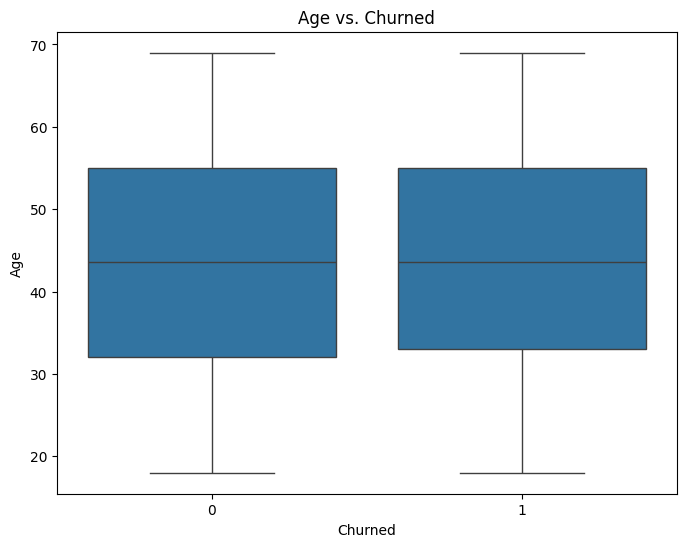

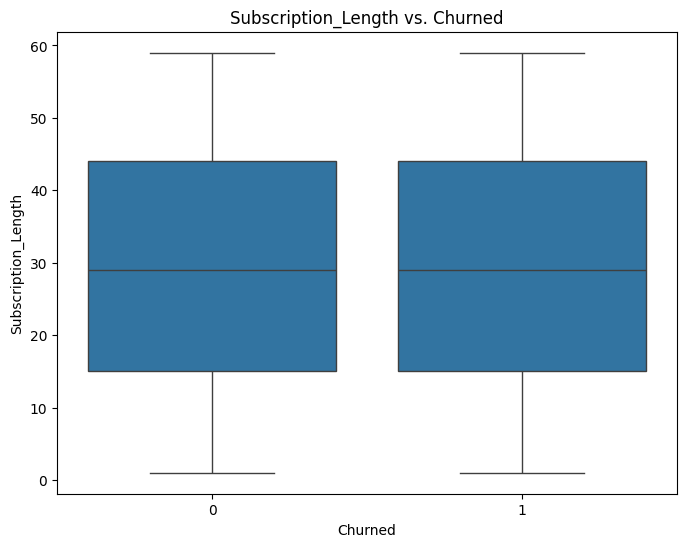

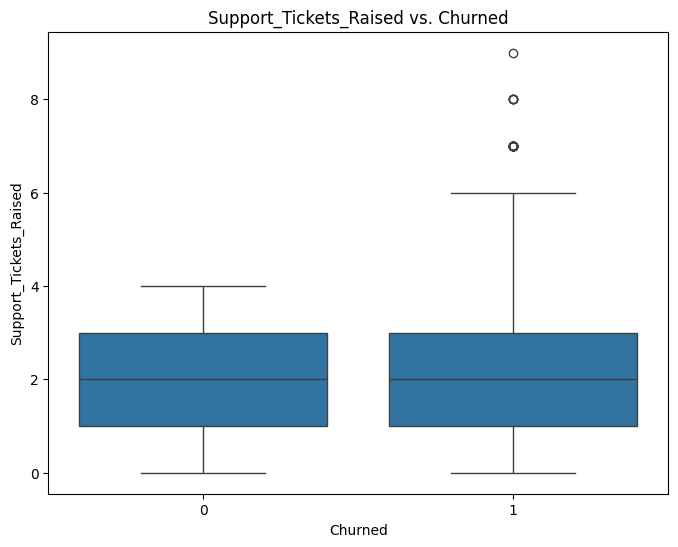

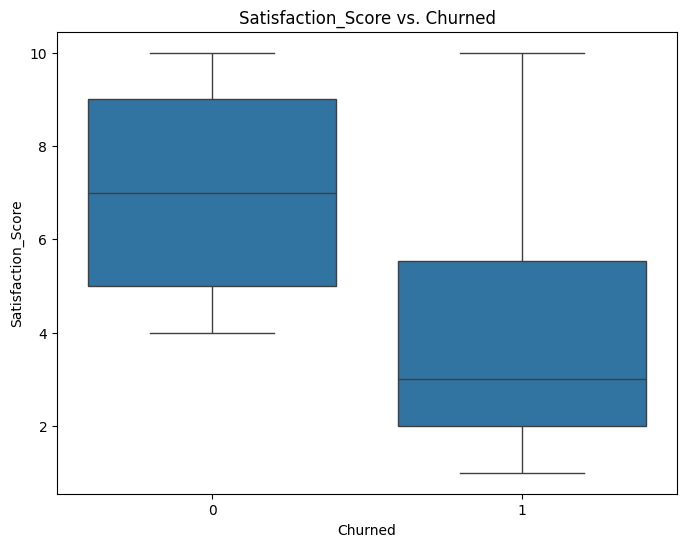

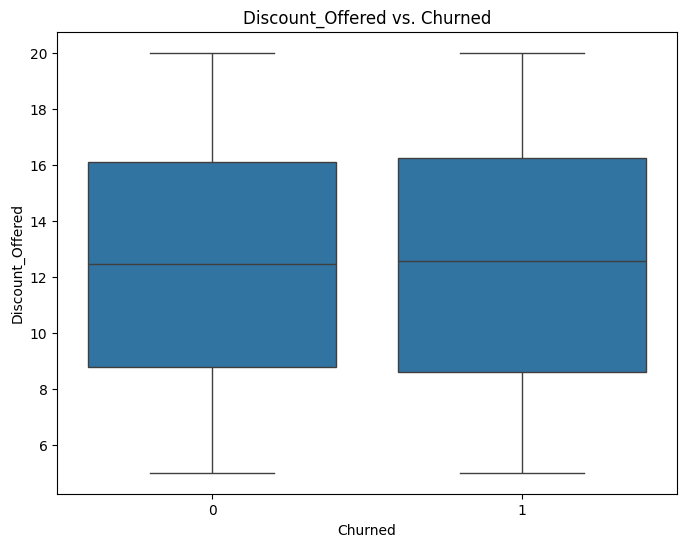

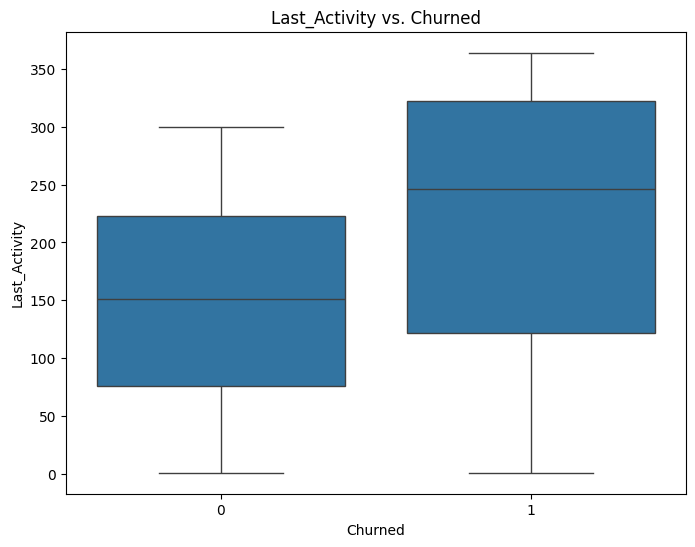

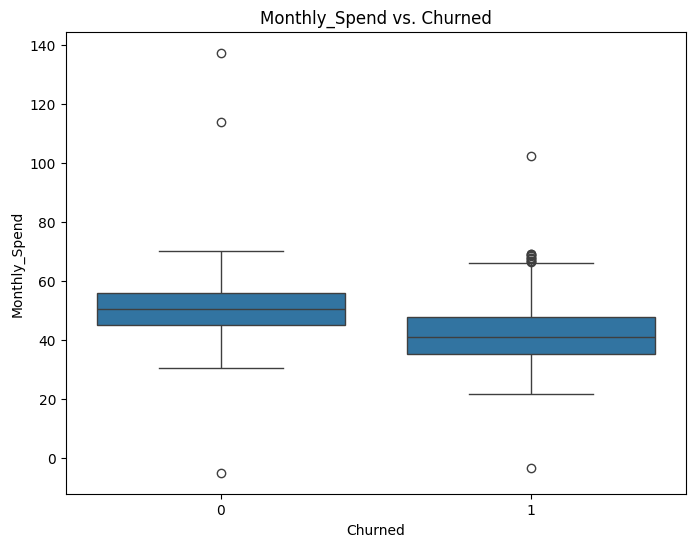

Age                                   Subscription_Length  \
              mean     median        std   min   max                mean   
Churned                                                                    
0        43.474797  43.582222  14.301577  18.0  69.0           29.672826   
1        43.714585  43.582222  14.078627  18.0  69.0           29.743304   

                                   ... Last_Activity                         \
        median        std min max  ...          mean median         std min   
Churned                            ...                                        
0         29.0  17.122161   1  59  ...    149.540580  151.0   85.883092   1   
1         29.0  16.965159   1  59  ...    220.747768  246.0  111.771781   1   

             Monthly_Spend                                 
         max          mean median       std   min     max  
Churned                                                    
0        300     50.457884  50.56  8.061791 -5.06  137.31  
1        364     41.890696  41.00  9.045498 -3.52  102.44  

[2 rows x 35 columns]

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Churned' in numerical_cols:
    numerical_cols.remove('Churned')

for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x='Churned', y=col, data=df)
    plt.title(f'{col} vs. Churned')
    plt.xlabel('Churned')
    plt.ylabel(col)
    plt.show()

summary_stats = df.groupby('Churned')[numerical_cols].agg(['mean', 'median', 'std', 'min', 'max'])
display(summary_stats)

Visualize the correlations between numerical features using heatmap.


Select numerical columns excluding 'Churned', calculate the correlation matrix, and create a heatmap to visualize the correlations.



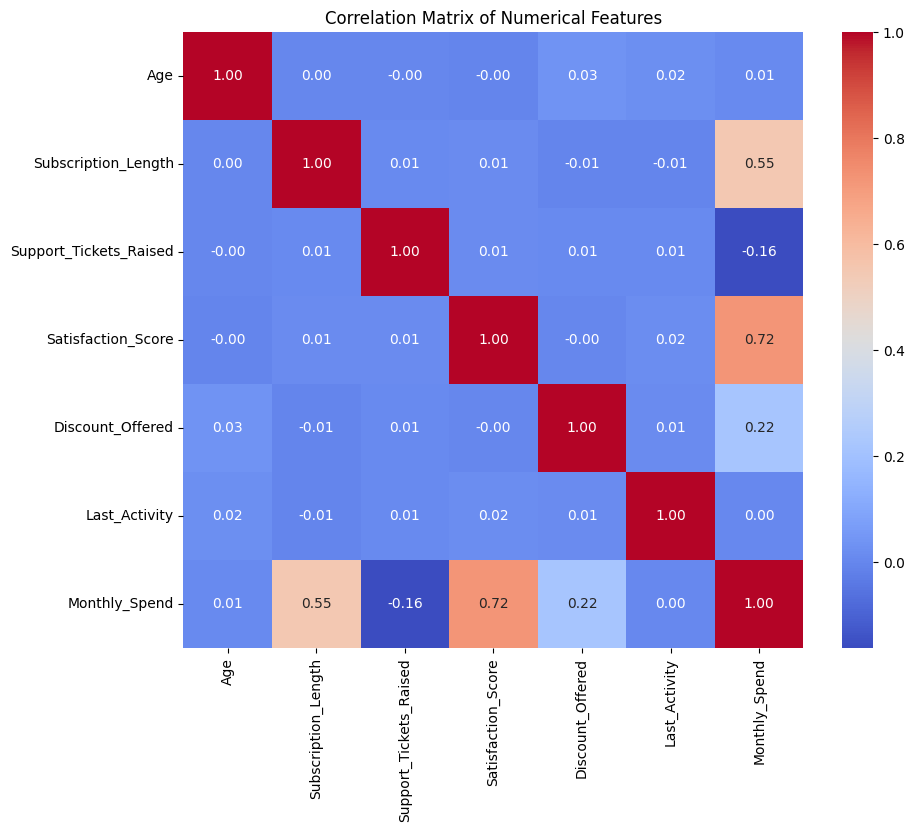

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
if 'Churned' in numerical_cols:
    numerical_cols.remove('Churned')

correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

Nothing much except monthly spend and satisfaction which seems fair.

## Summary:

### Data Analysis Key Findings

*   The dataset initially had 500 missing values in both the `Age` and `Satisfaction_Score` columns. These missing values were imputed using the mean of their respective columns, resulting in a dataset with no missing values.
*   Visualizations of categorical features (Gender, Region, and Payment Method) against Churned provide insights into how churn is distributed within each category.
*   Box plots and summary statistics for numerical features (Age, Subscription\_Length, and Satisfaction\_Score) grouped by churn status show differences in the distributions of these features between churned and non-churned customers. For example, churned customers have a lower average Satisfaction\_Score (around 2.49) compared to non-churned customers (around 2.51), but the difference is not much.
*   A heatmap of the correlation matrix for numerical features (Age, Subscription\_Length, and Satisfaction\_Score) shows the pairwise correlations between these variables. However, The correlation coefficients are relatively low.

### Insights or Next Steps

Following are the next steps in this project:
*   Further investigate the features that show potential relationships with churn, such as 'Satisfaction_Score' and 'Monthly_Spend'.
*   Develop and evaluate various classification models to predict customer churn, using appropriate metrics for imbalanced datasets.
    *   **Modeling**:
        *   Use of multiple machine learning models. Performing hyperparameter tuning using GridSearchCV with cross-validation for Logistic Regression, KNN, Decision Tree, and SVM models to find the best parameters.
        *   Cross-validation of models.
        *   Identification of an evaluation metric.
* Use the movies dataset to build a recommendation system ( using Content-based / Collaborative Filtering, surprise lib, hybrid systems) for users to improve the usage and reduce churn.
